In [1]:
import context

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from hier_clust.tree_util import reconstruct_tree

In [4]:
#filename = "../../data/CCS/subsetShots_5pct_reduced_with_cluster_id.csv"
filename = "../../data/CCS/ALL_reduced_with_cluster_id.csv"

In [5]:
annot_df = pd.read_csv(filename)

In [6]:
tree = reconstruct_tree(annot_df["cluster_id"])

In [7]:
print tree.prune(2).map_data(lambda x: len(x)).str_display()

Tree(data = 222726, children = [
  Tree(data = 197864, children = [
    Tree(data = 197607, children = [])
    Tree(data = 257, children = [])
  ])
  Tree(data = 24862, children = [
    Tree(data = 3172, children = [])
    Tree(data = 21690, children = [])
  ])
])


In [8]:
def get_ratio_info(tree):
    depth = tree.depth()
    if depth == 0:
        return [], []

    assert len(tree.children) == 2
    
    ratio = len(tree.children[0].data) / float(len(tree.data))
    sizes = [len(tree.data)]
    ratios = [ratio]

    for c in tree.children:
        s, r = get_ratio_info(c)
        sizes.extend(s)
        ratios.extend(r)
    
    return np.array(sizes), np.array(ratios)

In [9]:
s, r = get_ratio_info(tree)

In [10]:
large_cutoff = 500
small_cutoff = 20

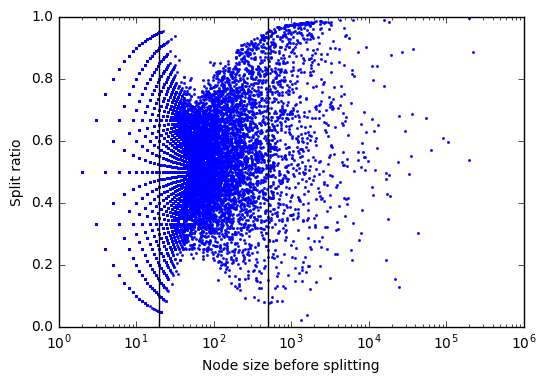

In [11]:
fig, ax = plt.subplots()
ax.semilogx(s, r, 'b.', markersize = 3.0)
ax.axvline(x=large_cutoff, color = 'k')
ax.axvline(x=small_cutoff, color = 'k')
ax.set_xlabel("Node size before splitting")
ax.set_ylabel("Split ratio")
None

In [12]:
masks = [
    ('Tiny nodes', s <= small_cutoff),
    ('Small nodes', (s > small_cutoff) & (s <= large_cutoff)),
    ('Large nodes', s > large_cutoff),
]

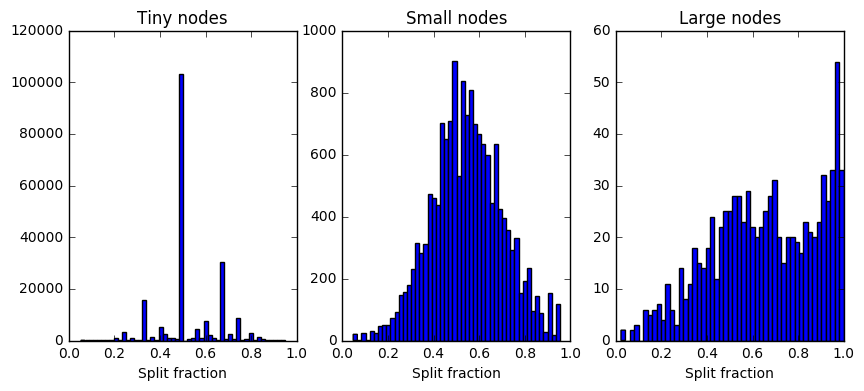

In [13]:
fig, axes = plt.subplots(1, len(masks))
fig.set_size_inches(10, 4, forward = True)
for i, (name, mask) in enumerate(masks):
    axes[i].hist(r[mask], bins = 50)
    axes[i].set_title(name)
    axes[i].set_xlabel('Split fraction')
    axes[i].set_xlim(0, 1)